In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
## missing values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
# rownumber,surname and customerid are use less for EDA
data=data.iloc[:,3:]
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
data['CreditScore'].unique() # int type is good

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [8]:
data['NumOfProducts'].unique() # have only four unique value but one hot encode should not be perform for ordinal or interval
# and number of product is some what ordinal or interval(never nominal)

array([1, 3, 2, 4])

In [9]:
data['Tenure'].unique() # same case is with Tenure, it is not nominal feature.

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [10]:
data['IsActiveMember'].unique()
#this is nominal but label encoded already.And don't require one hot encode bz binary

array([1, 0])

In [11]:
data['HasCrCard'].unique()
#this is also nominal but label encoded already.And don't require one hot encode bz binary

array([1, 0])

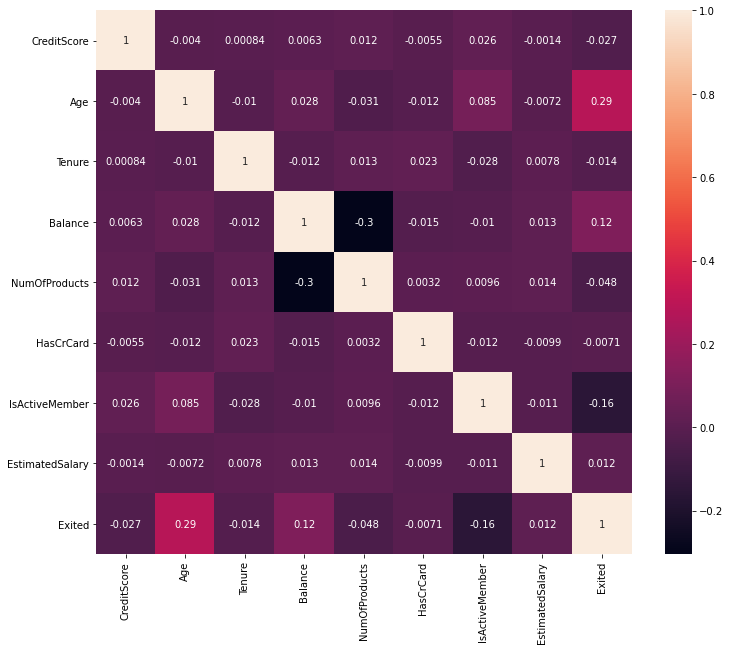

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))  
ax = sns.heatmap(data.corr(),annot=True,ax=ax)

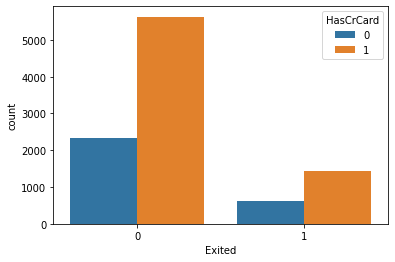

In [13]:
sns.countplot(data['Exited'],hue=data['HasCrCard'])

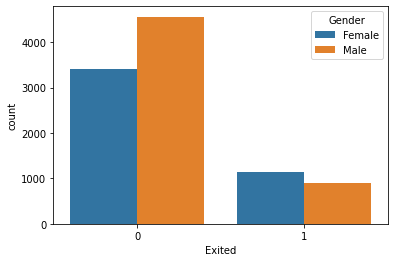

In [14]:
sns.countplot(data['Exited'],hue=data['Gender'])

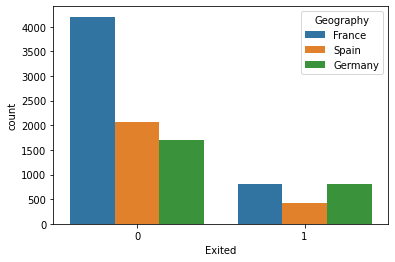

In [15]:
sns.countplot(data['Exited'],hue=data['Geography'])

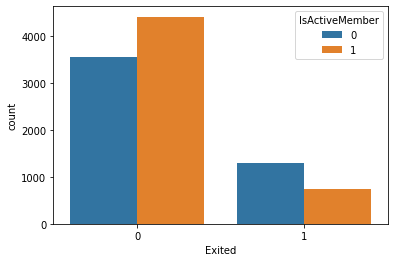

In [16]:
sns.countplot(data['Exited'],hue=data['IsActiveMember'])

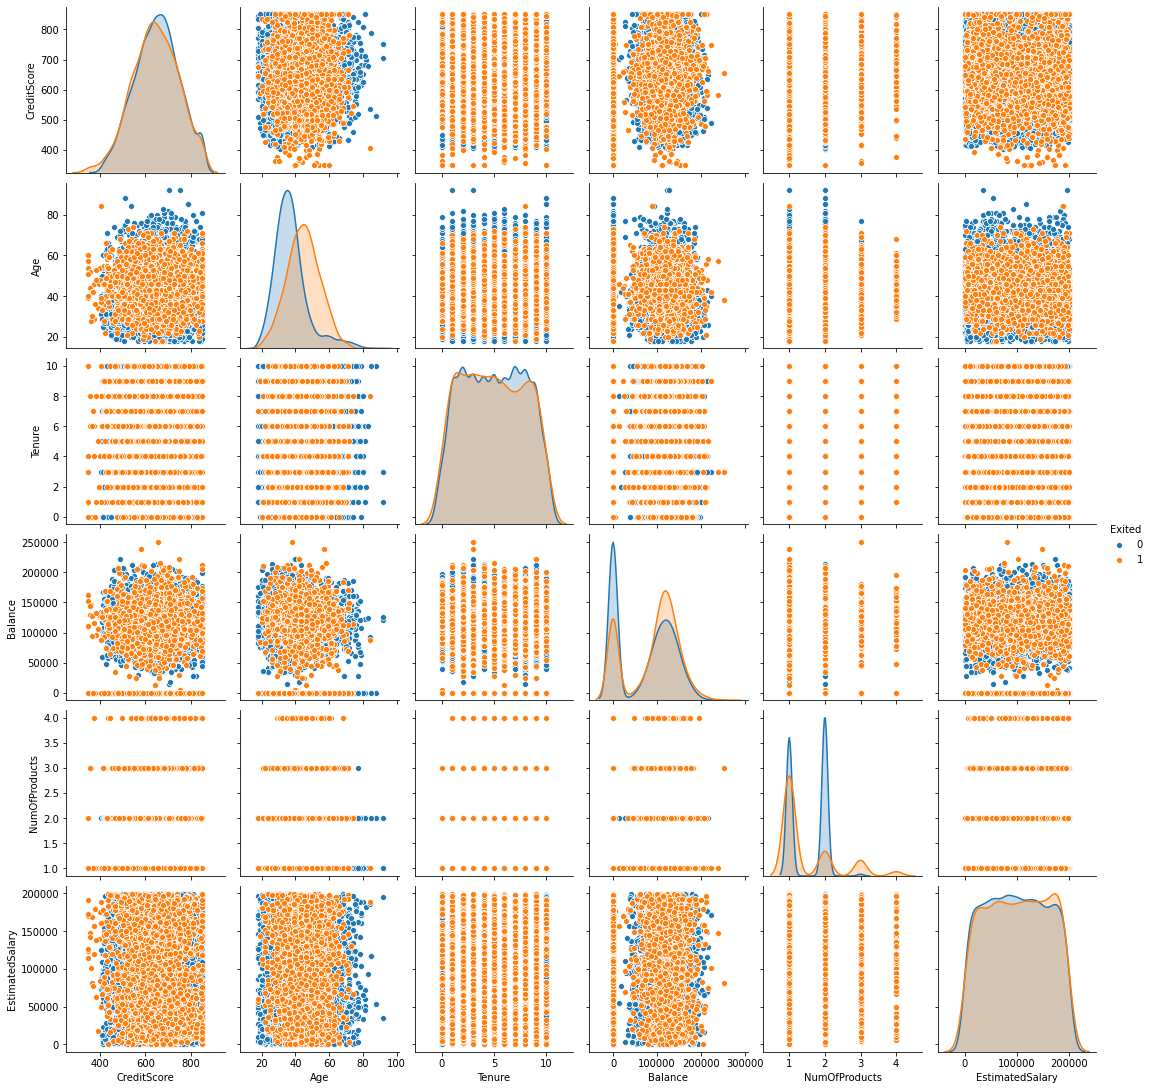

In [17]:
sns.pairplot(data=data.drop(['Geography','IsActiveMember','HasCrCard','Gender'],axis=1),hue='Exited')

In [18]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
data.Geography.unique() # three counties

array(['France', 'Spain', 'Germany'], dtype=object)

In [20]:
data.Gender.unique() # two values

array(['Female', 'Male'], dtype=object)

In [21]:
Geography_dummies=pd.get_dummies(data['Geography'],drop_first=True)
Geography_dummies # drop first true to avoid dummy variable trap

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [22]:
Gender_dummies=pd.get_dummies(data['Gender'],drop_first=True)
Gender_dummies

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [23]:
y=data.iloc[:,-1]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [24]:
data.drop(['Exited','Geography','Gender'],axis=1,inplace=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [25]:
X=pd.concat([data,Geography_dummies,Gender_dummies],axis=1)
print(X.shape)
X.head()

(10000, 11)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


### Hyperparameter Optimization with RandomizedSearchCV and GridSearchCV

In [26]:
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.805

In [28]:
rfc= RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.864

In [29]:
lr= LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.789

In [30]:
# ensemble learning technique seemed to be best for model
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc.score(X_test,y_test)

0.867

In [31]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
max_features = list(range(1,X.shape[1]))
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
params={
  "learning_rate"    : [0.01,0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
  "max_depth"        : [2,3,5,6,8,10,12,15,17,20],
  "n_estimators" : [1, 2, 4, 8, 16, 32, 64, 100, 200],
  "min_samples_split":min_samples_splits,
  "max_features":max_features,
  "min_samples_leaf":min_samples_leafs

}

In [32]:
# time function
import time
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [33]:
classifier = GradientBoostingClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [34]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    2.0s remaining:    0.6s



 Time taken: 0 hours 0 minutes and 2.44 seconds.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.4s finished


In [35]:
random_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.25, max_features=5,
                           min_samples_leaf=0.1,
                           min_samples_split=0.30000000000000004,
                           n_estimators=8)

In [36]:
random_search.best_params_

{'n_estimators': 8,
 'min_samples_split': 0.30000000000000004,
 'min_samples_leaf': 0.1,
 'max_features': 5,
 'max_depth': 3,
 'learning_rate': 0.25}

In [37]:
classifier = GradientBoostingClassifier(**random_search.best_params_)

In [38]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.1,random_state=50)
score= cross_val_score(classifier,X,y,cv=cv)

In [39]:
score.mean()

0.8238